In [32]:
# Machine learning: Diagram imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [33]:
#import csv
df = pd.read_csv('Data\Obfuscated-MalMem2022.csv')
df.drop('Category', axis=1, inplace=True)
df.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0            45            17           10.555556                   0   
1            47            19           11.531915                   0   
2            40            14           14.725000                   0   
3            32            13           13.500000                   0   
4            42            16           11.452381                   0   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0           202.844444           1694                  38.500000   
1           242.234043           2074                  44.127660   
2           288.225000           1932                  48.300000   
3           264.281250           1445                  45.156250   
4           281.333333           2067                  49.214286   

   handles.nhandles  handles.avg_handles_per_proc  handles.nport  ...  \
0              9129                    212.302326              0  ...   
1             11385                    242.234043              0  ...   
2             11529                    288.225000              0  ...   
3              8457                    264.281250              0  ...   
4             11816                    281.333333              0  ...   

   svcscan.kernel_drivers  svcscan.fs_drivers  svcscan.process_services  \
0                     221                  26                        24   
1                     222                  26                        24   
2                     222                  26                        27   
3                     222                  26                        27   
4                     222                  26                        24   

   svcscan.shared_process_services  svcscan.interactive_process_services  \
0                              116                                     0   
1                              118                                     0   
2                              118                                     0   
3                              118                                     0   
4                              118                                     0   

   svcscan.nactive  callbacks.ncallbacks  callbacks.nanonymous  \
0              121                    87                     0   
1              122                    87                     0   
2              120                    88                     0   
3              120                    88                     0   
4              124                    87                     0   

   callbacks.ngeneric   Class  
0                   8  Benign  
1                   8  Benign  
2                   8  Benign  
3                   8  Benign  
4                   8  Benign  

[5 rows x 56 columns]

In [34]:
# X and y values
X = df.drop('Class', axis=1)
y = df['Class']

In [35]:
X.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0            45            17           10.555556                   0   
1            47            19           11.531915                   0   
2            40            14           14.725000                   0   
3            32            13           13.500000                   0   
4            42            16           11.452381                   0   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0           202.844444           1694                  38.500000   
1           242.234043           2074                  44.127660   
2           288.225000           1932                  48.300000   
3           264.281250           1445                  45.156250   
4           281.333333           2067                  49.214286   

   handles.nhandles  handles.avg_handles_per_proc  handles.nport  ...  \
0              9129                    212.302326              0  ...   
1             11385                    242.234043              0  ...   
2             11529                    288.225000              0  ...   
3              8457                    264.281250              0  ...   
4             11816                    281.333333              0  ...   

   svcscan.nservices  svcscan.kernel_drivers  svcscan.fs_drivers  \
0                389                     221                  26   
1                392                     222                  26   
2                395                     222                  26   
3                395                     222                  26   
4                392                     222                  26   

   svcscan.process_services  svcscan.shared_process_services  \
0                        24                              116   
1                        24                              118   
2                        27                              118   
3                        27                              118   
4                        24                              118   

   svcscan.interactive_process_services  svcscan.nactive  \
0                                     0              121   
1                                     0              122   
2                                     0              120   
3                                     0              120   
4                                     0              124   

   callbacks.ncallbacks  callbacks.nanonymous  callbacks.ngeneric  
0                    87                     0                   8  
1                    87                     0                   8  
2                    88                     0                   8  
3                    88                     0                   8  
4                    87                     0                   8  

[5 rows x 55 columns]

In [36]:
#drop columns with no standard deviation of 0
X = X.drop(labels=X.loc[:, X.std() == 0].columns, axis=1)
print("dropped columns with no standard deviation of 0")


dropped columns with no standard deviation of 0


C:\Users\thaba\AppData\Local\Temp\ipykernel_43564\3518713352.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


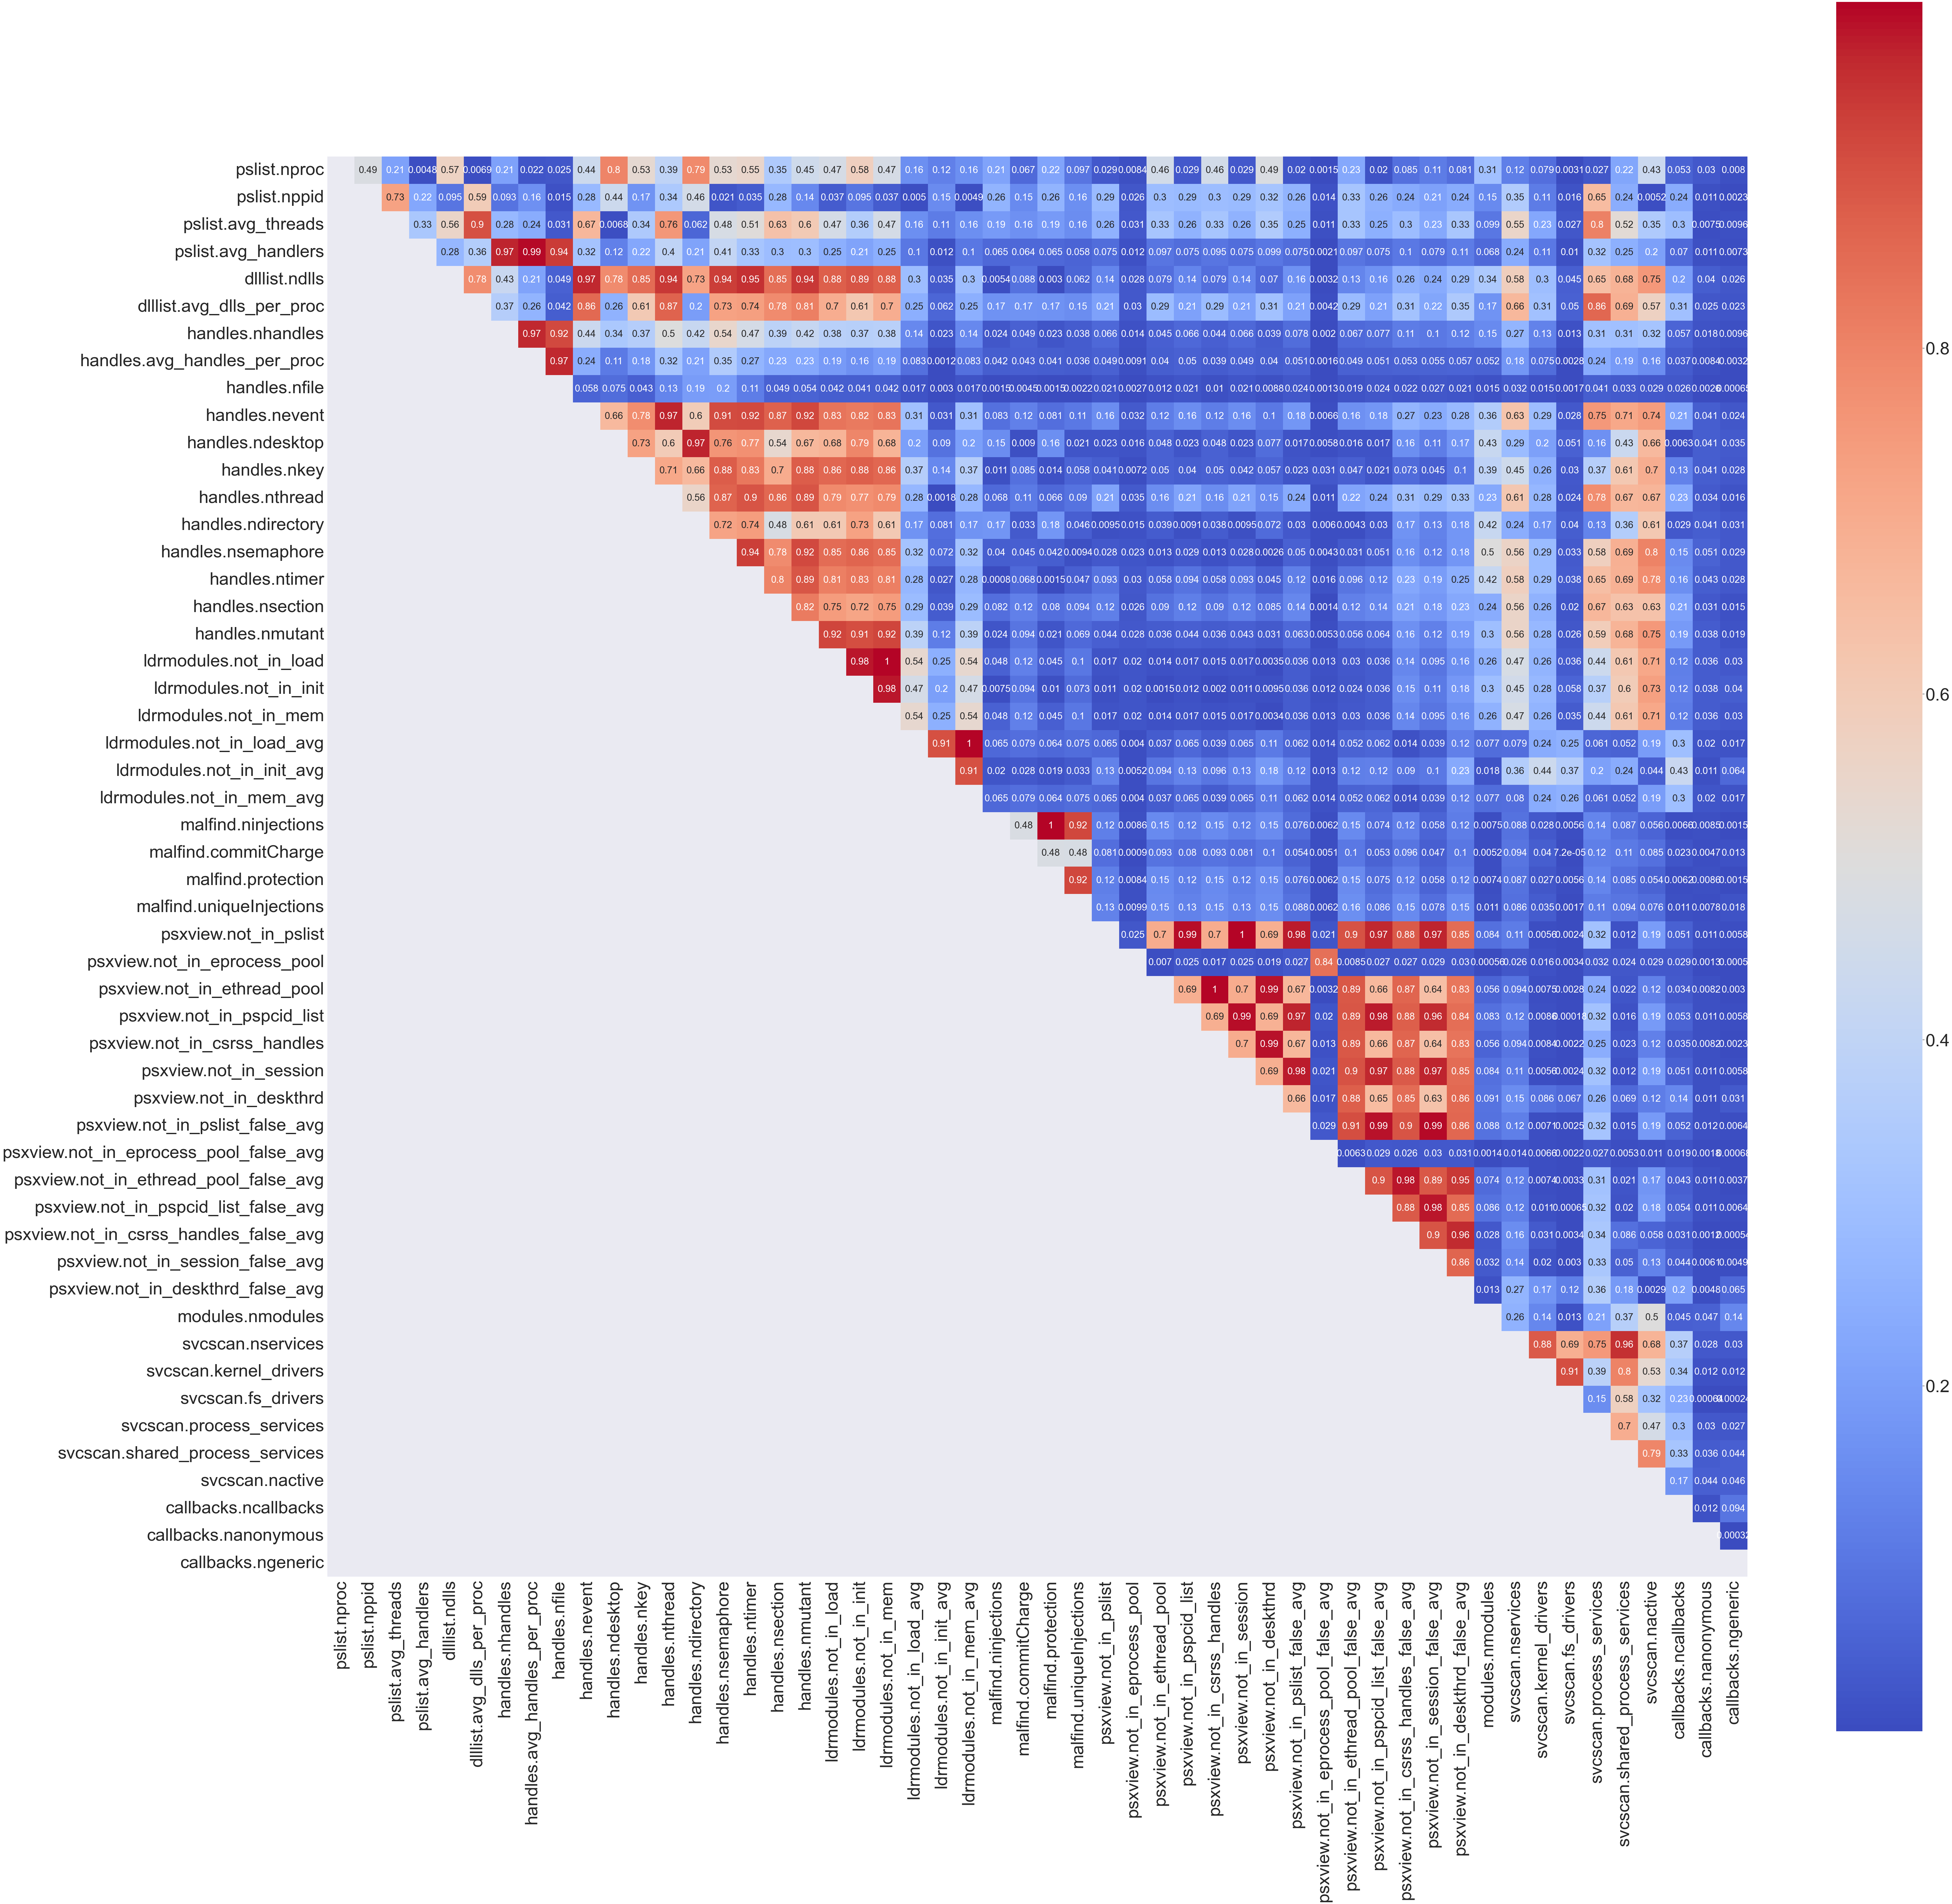

In [37]:


corr_matrix = abs(X.corr())
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#threshold
threshold = 0.5

# correlation heatmap
plt.figure(figsize=(100, 100))
sns.heatmap(upper_tri, annot=True, square=True,
            cmap='coolwarm', annot_kws={"size": 30})
plt.show()


In [38]:



# drop columns with high correlation
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
X_corr = X.drop(to_drop, axis=1)
print("dropped columns with high correlation")
X_corr.info()

dropped columns with high correlation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pslist.nproc                  58596 non-null  int64  
 1   pslist.nppid                  58596 non-null  int64  
 2   pslist.avg_handlers           58596 non-null  float64
 3   malfind.ninjections           58596 non-null  int64  
 4   malfind.commitCharge          58596 non-null  int64  
 5   psxview.not_in_pslist         58596 non-null  int64  
 6   psxview.not_in_eprocess_pool  58596 non-null  int64  
 7   callbacks.ncallbacks          58596 non-null  int64  
 8   callbacks.nanonymous          58596 non-null  int64  
 9   callbacks.ngeneric            58596 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.5 MB


C:\Users\thaba\AppData\Local\Temp\ipykernel_43564\3721866556.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


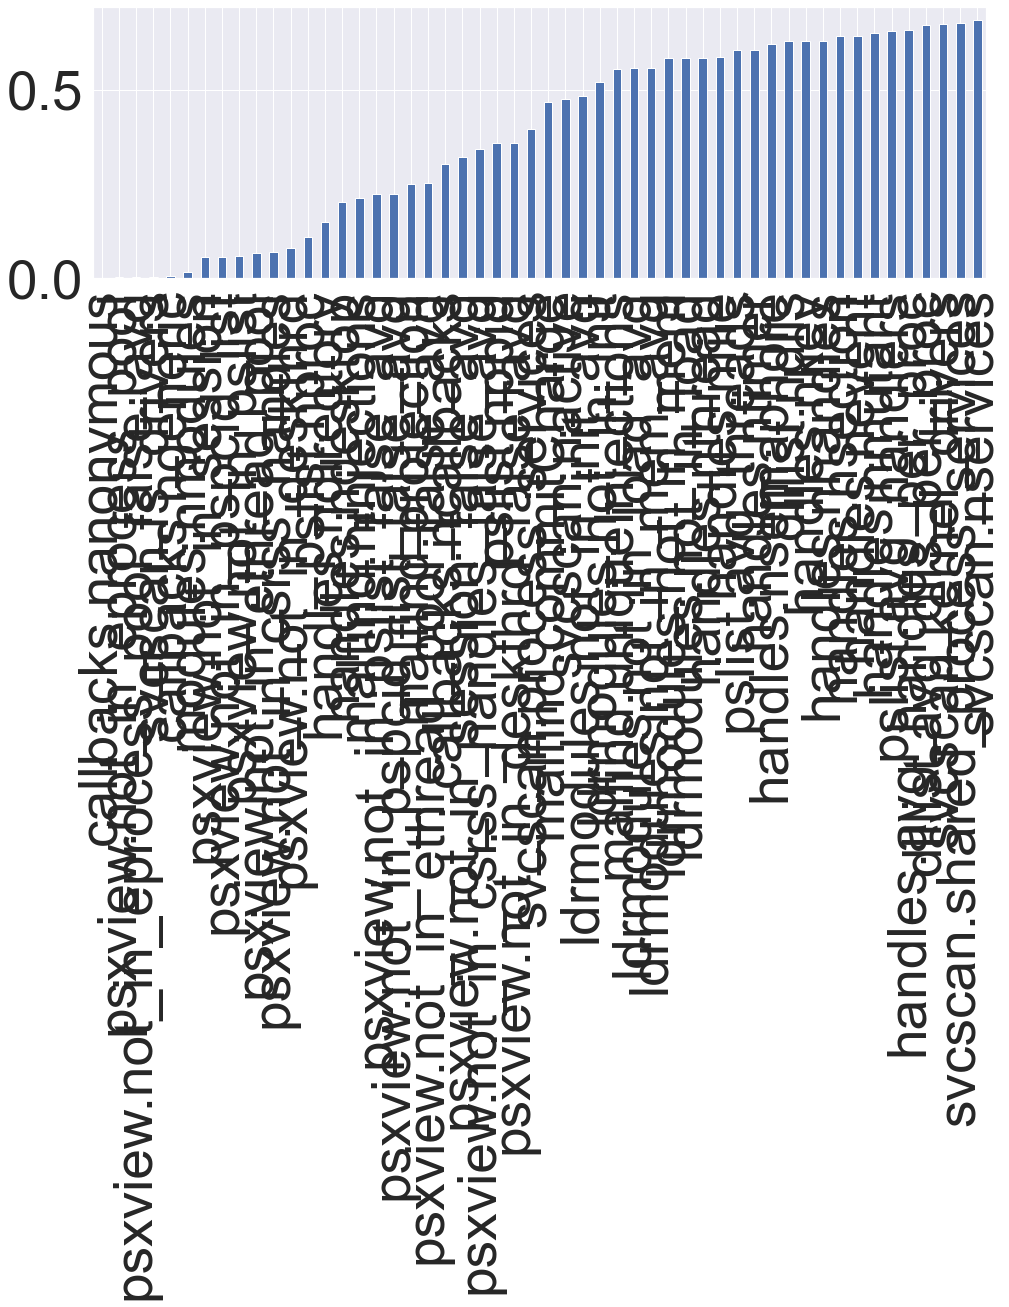

In [41]:
# mutual information
from sklearn.feature_selection import mutual_info_classif

# calculate the mutual information
mi = mutual_info_classif(X, y)
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=True, inplace=True)
mi.plot.bar(figsize=(16, 5))
plt.show()

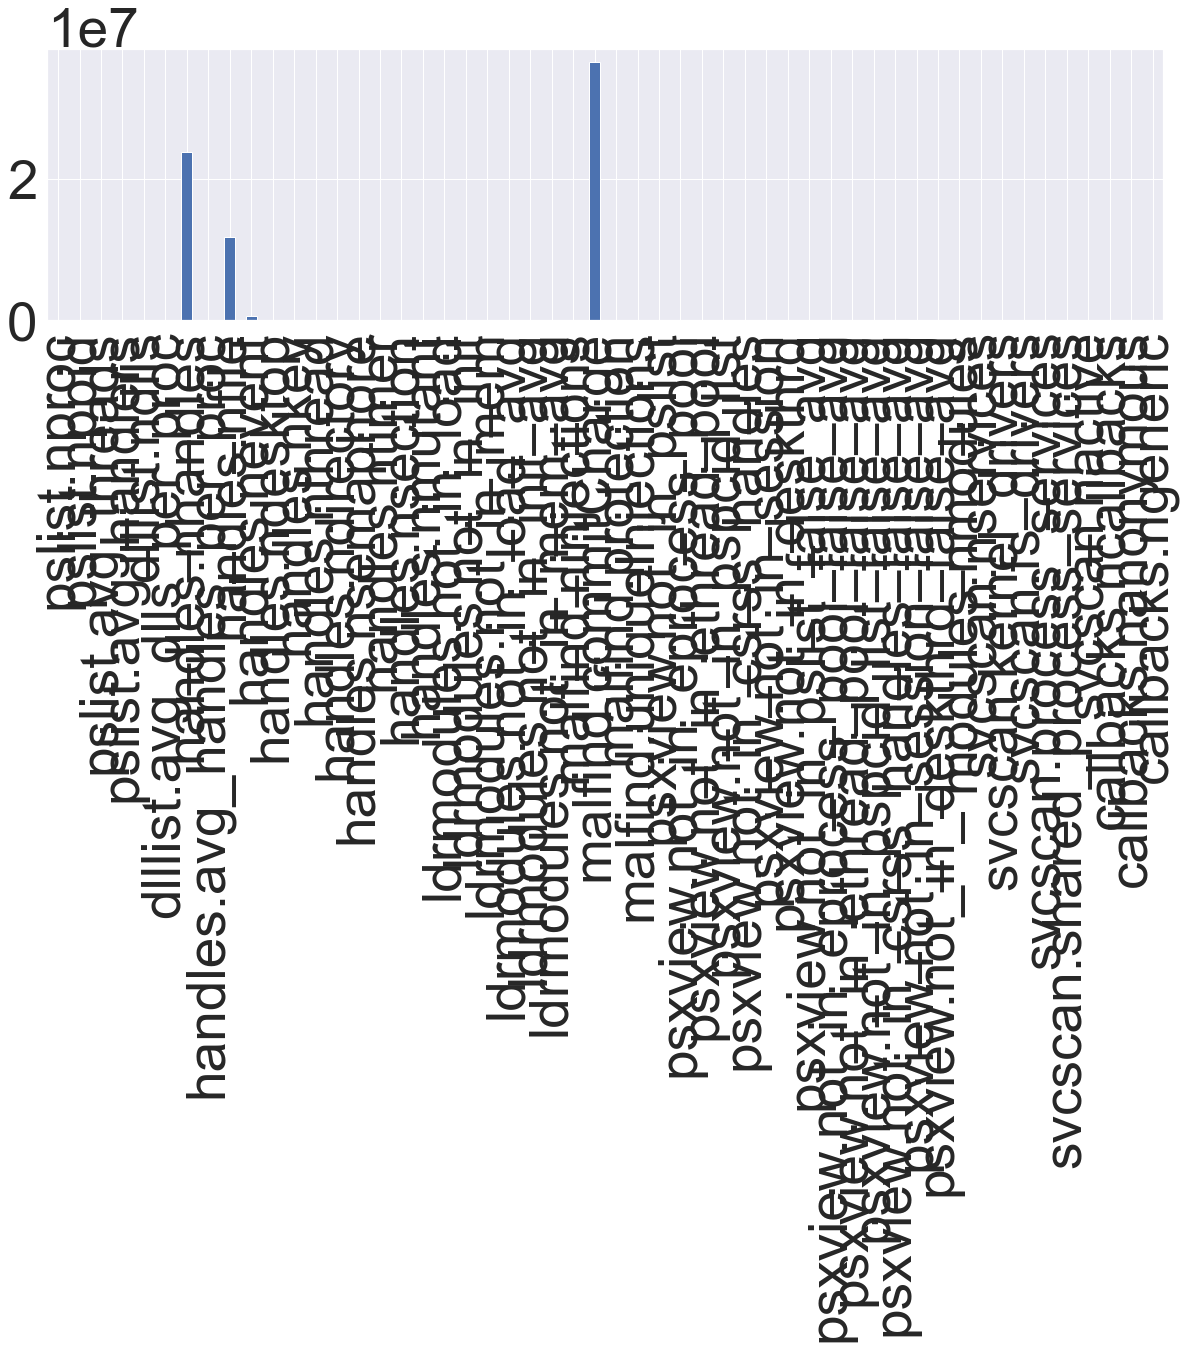

In [40]:
# plot variance of features
X.var().plot.bar(figsize=(20, 5))
plt.show()